<table style="border:2px solid white;" cellspacing="0" cellpadding="0" border-collapse: collapse; border-spacing: 0;>
  <tr> 
    <th style="background-color:white"> <img src="../media/CCAL.png" width=225 height=225></th>
    <th style="background-color:white"> <img src="../media/logoMoores.jpg" width=175 height=175></th>
    <th style="background-color:white"> <img src="../media/GP.png" width=200 height=200></th>
    <th style="background-color:white"> <img src="../media/UCSD_School_of_Medicine_logo.png" width=175 height=175></th> 
    <th style="background-color:white"> <img src="../media/Broad.png" width=130 height=130></th> 
  </tr>
</table>

<hr style="border: none; border-bottom: 3px solid #88BBEE;">

# **Onco-*GPS* Methodology**
## **Chapter 9. Additional Analysis - KRAS Mutant Onco-*GPS***

**Authors:** Huwate (Kwat) Yeerna -  *Computational Cancer Analysis Laboratory (CCAL), UCSD Moores Cancer Center*  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
 William Kim - Cancer Program, *Eli and Edythe Broad Institute*      
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
Taylor Cavazos - *Computational Cancer Analysis Laboratory (CCAL), UCSD Moores Cancer Center*   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
Kate Medetgul-Ernar - *Computational Cancer Analysis Laboratory (CCAL), UCSD Moores Cancer Center*   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
Clarence Mah - *Mesirov Lab, UCSD School of Medicine and Moores Cancer Center*      
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
Jill P. Mesirov - *Mesirov Lab, UCSD School of Medicine and Moores Cancer Center*  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
Pablo Tamayo - *Computational Cancer Analysis Laboratory (CCAL), UCSD Moores Cancer Center* 

**Date:** Jan 5, 2017

**Article:** [*Kim et al.* Decomposing Oncogenic Transcriptional Signatures to Generate Maps of Divergent Cellular States](https://drive.google.com/file/d/0B0MQqMWLrsA4b2RUTTAzNjFmVkk/view?usp=sharing)


**Analysis overview:**
In this notebook we perform additional complementary analysis such as displaying the component amplitudes as features (e.g. the analysis to produce Fig S7 in the article).

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
### 1. Set up notebook and import Computational Cancer Analysis Library ([CCAL](https://github.com/KwatME/ccal))

In [2]:
import sys
import os
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (8, 5)
mpl.rcParams['figure.max_open_warning'] = 100
HOME_DIR = os.environ['HOME']
sys.path.insert(0, os.path.join(HOME_DIR, 'ccal'))
import ccal
import warnings
warnings.filterwarnings("ignore")

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
### 2. Set parameters, data and result directories
These are the directories where the output and intermediate files will be stored

In [3]:
DATA_DIR = HOME_DIR + '/OncoGPS_Analysis2/data'
RESULTS_DIR = HOME_DIR + '/OncoGPS_Analysis2/results'

MUT_CNA_DATASET = DATA_DIR + '/ccle_mut_cna.gct'
GENE_DEPENDENCY_DATASET = DATA_DIR +  '/ccle_gene_dependency.gct'
GENE_EXPRESSION_DATASET = DATA_DIR + '/rnaseq.v3.NO_HAEM.gct'
PATHWAY_EXPRESSION_DATASET = DATA_DIR + '/ccle_pathway_expression_all.gct'
REGULATOR_DATASET = DATA_DIR + '/ccle_regulator.gct'
PROTEIN_EXPRESSION_DATASET = DATA_DIR + '/ccle_protein_expression.gct'
TISSUE_DATASET = DATA_DIR + '/ccle_tissue.gct'
DRUG_DEPENDENCY_DATASET = DATA_DIR + '/ccle_drug_sensitivity.gct'

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
### 3. Load the Feature Datasets

In [3]:
mut_cna_df = ccal.read_gct(MUT_CNA_DATASET)
gene_dependency_df = ccal.read_gct(GENE_DEPENDENCY_DATASET)
gene_expression_df = ccal.read_gct(GENE_EXPRESSION_DATASET)
pathway_expression_df = ccal.read_gct(PATHWAY_EXPRESSION_DATASET)
regulator_df = ccal.read_gct(REGULATOR_DATASET)
protein_expression_df = ccal.read_gct(PROTEIN_EXPRESSION_DATASET)
tissue_df = ccal.read_gct(TISSUE_DATASET)
drug_dependency_df = ccal.read_gct(DRUG_DEPENDENCY_DATASET)

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
### 4. Load clustering results

In [4]:
red, blue, green, purple, black, white = '#4292C6', '#41AB5D', '#EF3B2C', '#807DBA', '#000000', '#FFFFFF'
kras_mutants = mut_cna_df.columns[mut_cna_df.ix['KRAS_MUT', :].astype(bool)]
h_matrix = ccal.read_gct(RESULTS_DIR + '/nmf/matrices/nmf_k9_h.gct')
kras_mutant_h_matrix = h_matrix.ix[:, h_matrix.columns & kras_mutants]
kras_h_matrix = kras_mutant_h_matrix.ix[[7, 2, 1], :]
kras_clusterings = ccal.read_gct(RESULTS_DIR + '/clusterings/clusterings.gct')
kras_sample_labels = kras_clusterings.ix[4, :]

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
### 5. Component amplitudes displayed as features (this is Fig S7 in the article).

In [5]:
components = pd.DataFrame(index=['Vertex 1', 'Vertex 2', 'Vertex 3'], columns=['x', 'y'])
components.iloc[0, :] = [0.5, np.sqrt(3)/2]
components.iloc[1, :] = [1, 0]
components.iloc[2, :] = [0, 0]

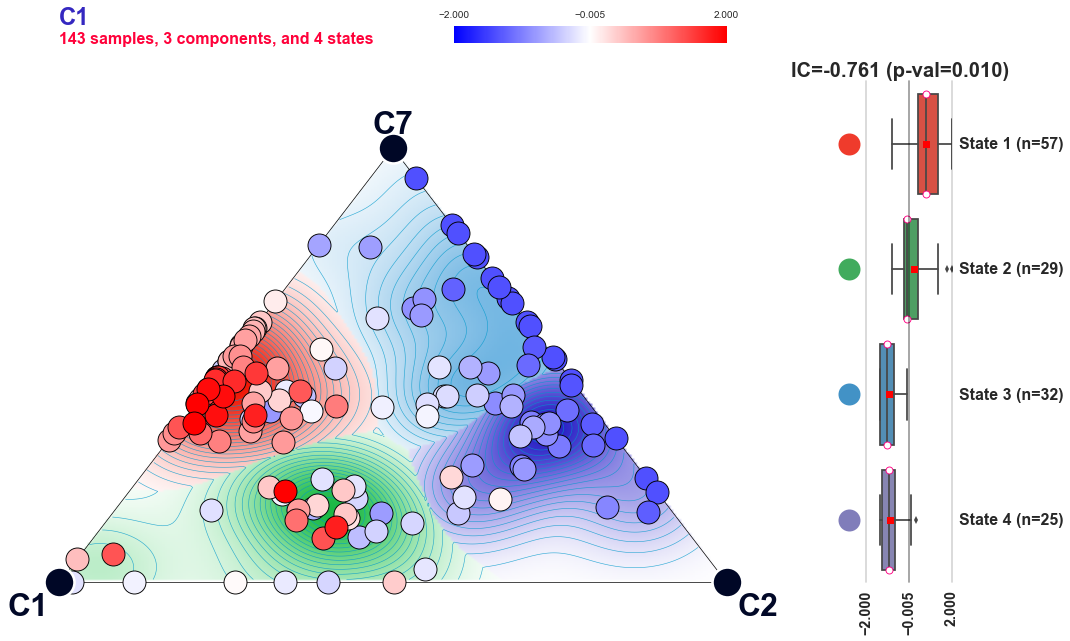

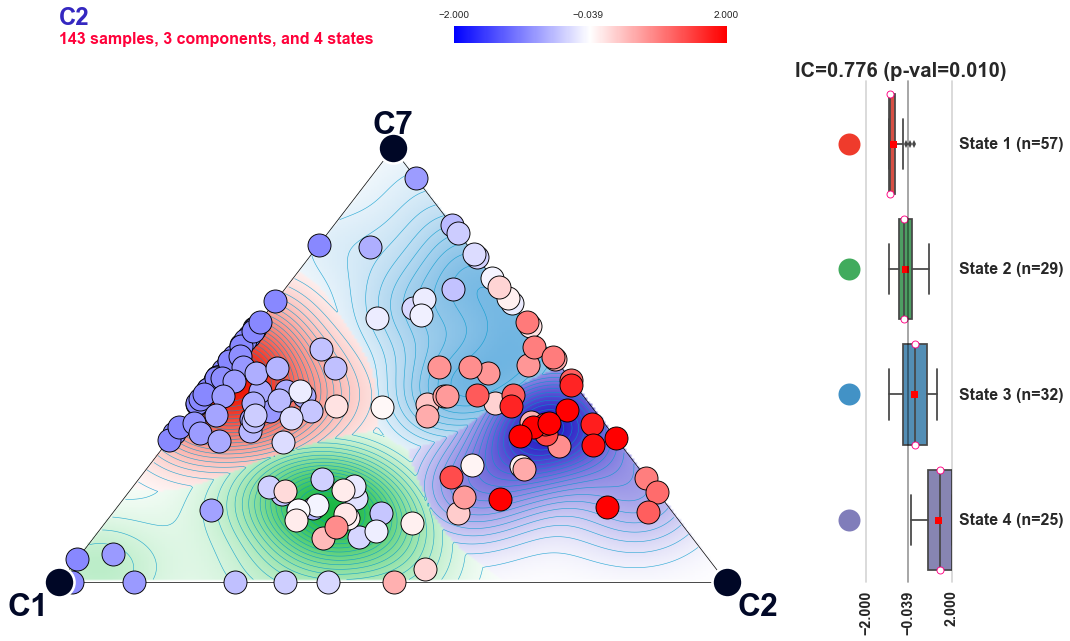

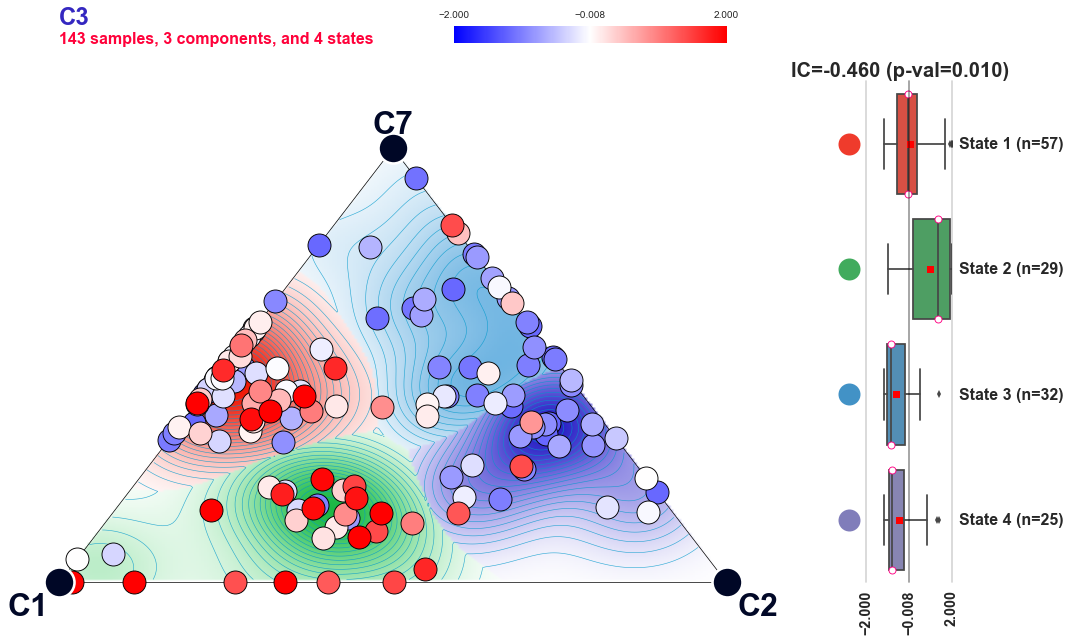

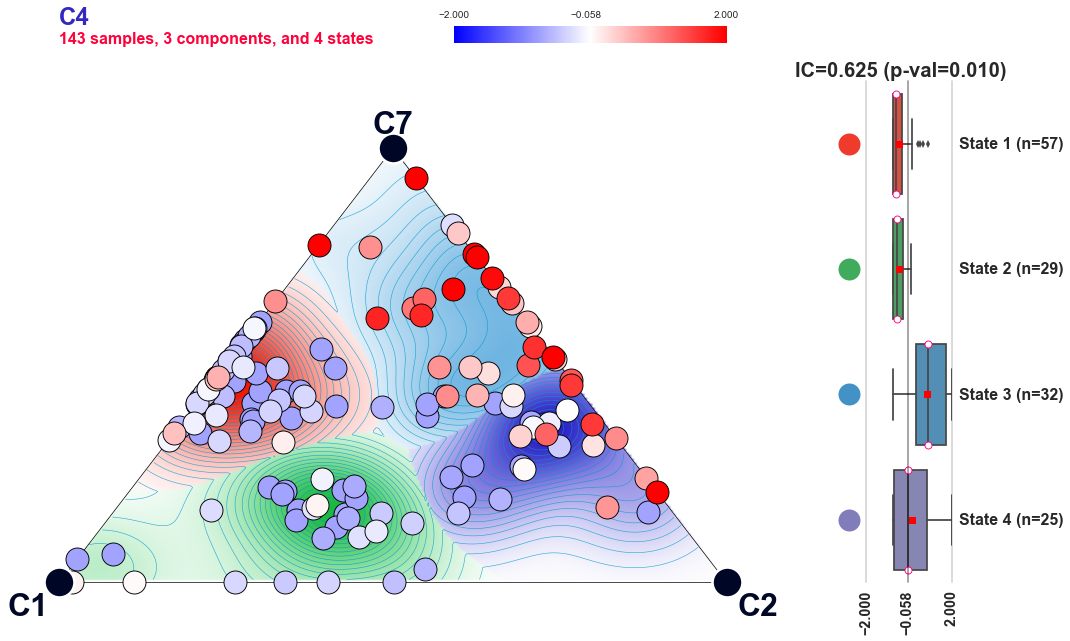

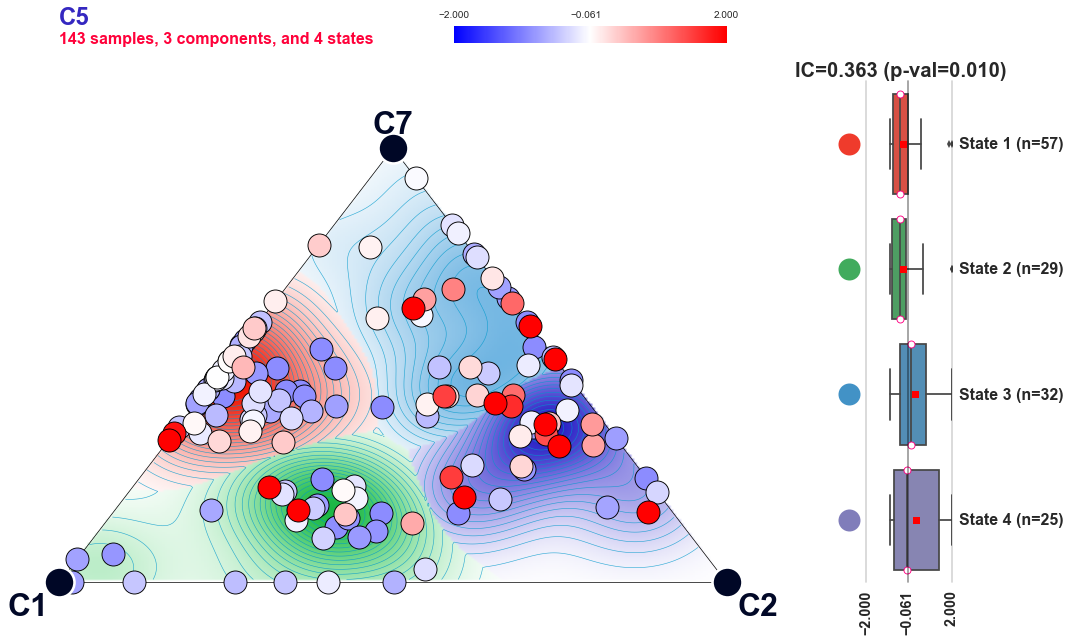

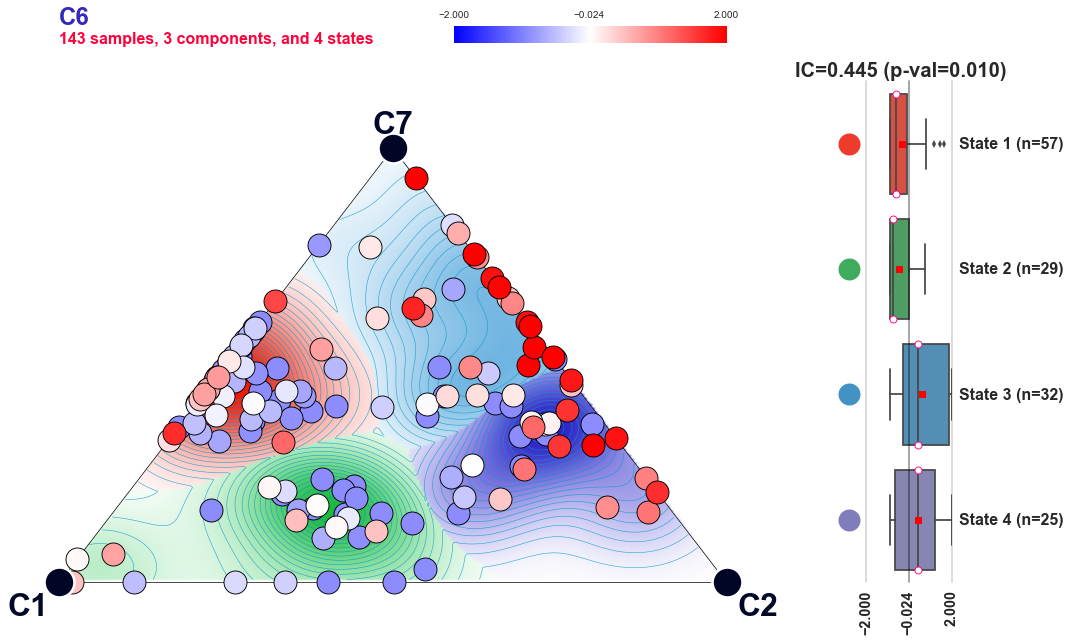

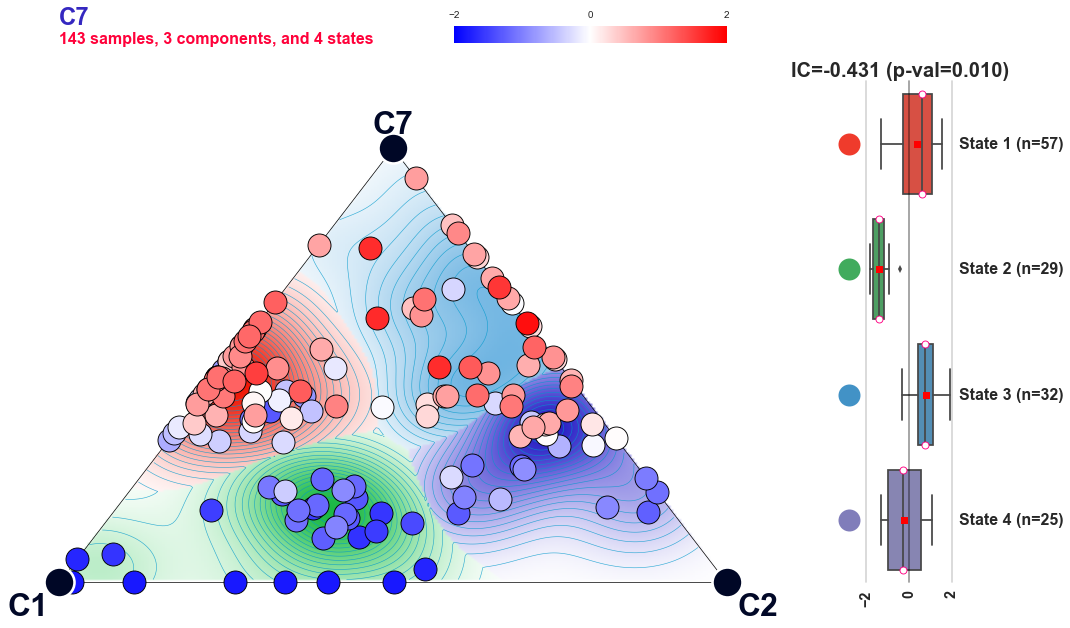

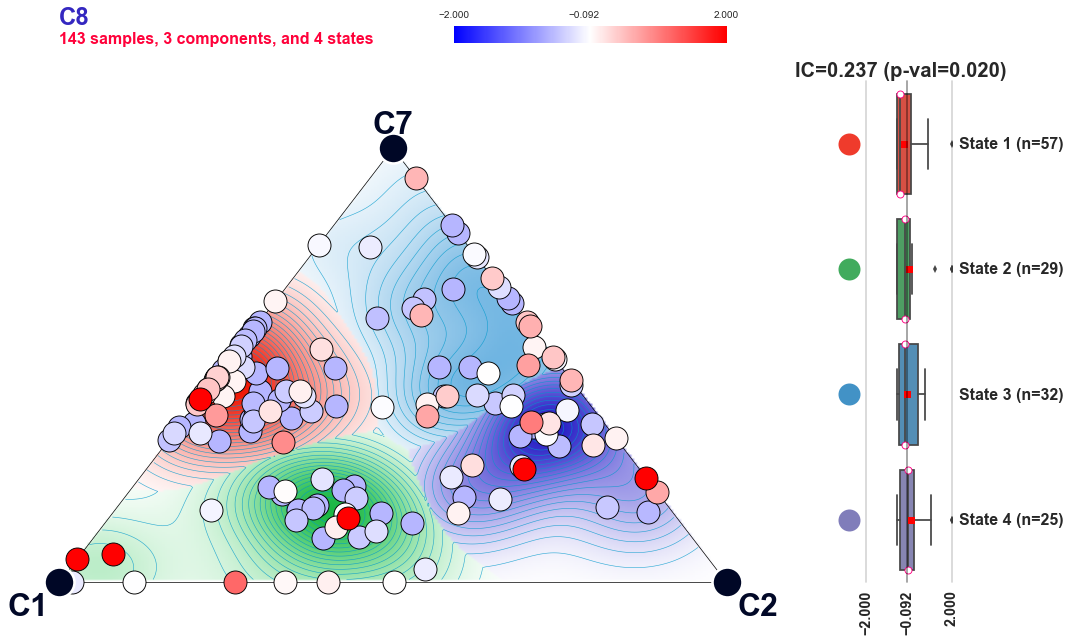

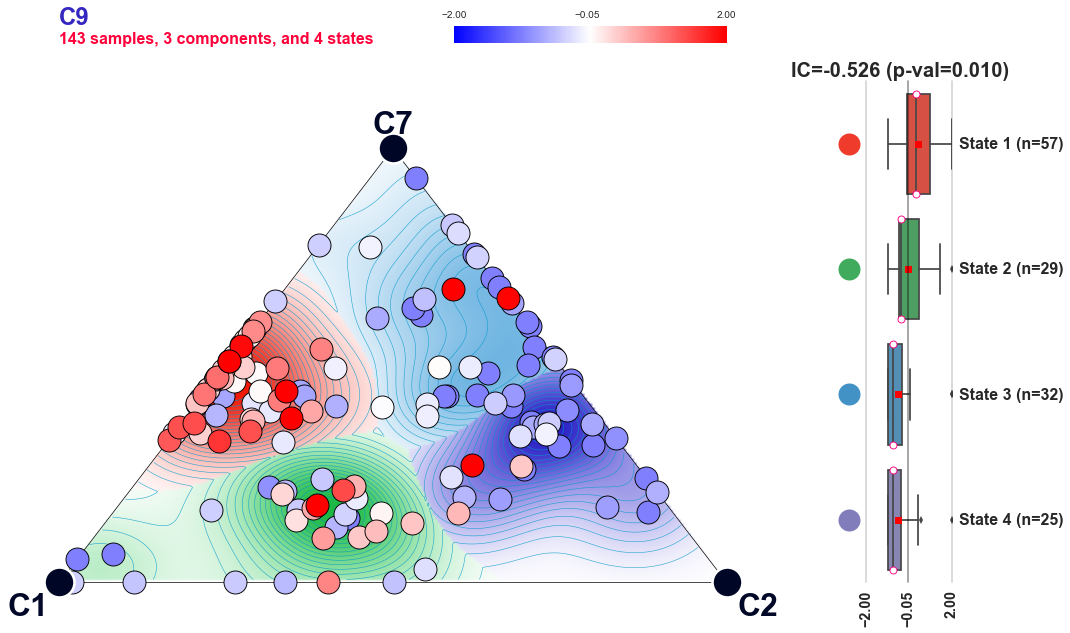

In [6]:
for i, alias in [(1, 'C1'),(2, 'C2'),(3, 'C3'), (4, 'C4'),(5, 'C5'),(6, 'C6'),(7, 'C7'),(8, 'C8'),(9, 'C9')]:
    
    annotation = kras_mutant_h_matrix.ix[i, kras_h_matrix.columns]
    annotation.name = alias
    ccal.oncogps.make_oncogps(training_h = kras_h_matrix, 
                          training_states = kras_sample_labels, 
                          annotation = annotation,
                          title = annotation.name,
                          components = components,
                          effectplot_type = 'box',
                          colors=[green, blue, red, purple],
                          component_names = ["C7", "C2", "C1"],
                          std_max = 2,
                          filepath = RESULTS_DIR + 
                             '/KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
### 6. Compare the NMF components with the KRAS components from  earlier analysis

KRAS_SALE_Late_Comp_C1_9  KRAS_SALE_Late_Comp_C2_9  \
6                 -0.613473                  0.335737   
3                  0.597994                 -0.411449   
2                 -0.490572                  0.890194   
9                  0.563959                 -0.427752   
7                 -0.322240                  0.253816   
1                  0.940763                 -0.427089   
5                 -0.399636                 -0.304398   
4                 -0.753368                 -0.482179   
8                  0.430493                  0.363206   

   KRAS_SALE_Late_Comp_C3_9  KRAS_SALE_Late_Comp_C4_9  \
6                 -0.424171                  0.570095   
3                  0.932188                 -0.601181   
2                 -0.439680                 -0.446562   
9                 -0.409431                 -0.469773   
7                  0.379720                 -0.411146   
1                  0.472746                 -0.682098   
5                 -0.399247                 -0.444002   
4                 -0.551340                  0.964687   
8                 -0.353345                 -0.413656   

   KRAS_SALE_Late_Comp_C5_9  KRAS_SALE_Late_Comp_C6_9  \
6                 -0.319419                  0.899517   
3                 -0.346249                 -0.469652   
2                  0.357516                  0.344476   
9                 -0.431220                 -0.496254   
7                 -0.294209                 -0.348946   
1                 -0.309384                 -0.579667   
5                  0.939287                 -0.391988   
4                 -0.358220                  0.657525   
8                 -0.350949                 -0.395616   

   KRAS_SALE_Late_Comp_C7_9  KRAS_SALE_Late_Comp_C8_9  \
6                 -0.337929                 -0.384059   
3                 -0.385647                 -0.421011   
2                 -0.402619                  0.627362   
9                 -0.301239                 -0.449271   
7                  0.878933                 -0.486968   
1                 -0.284872                 -0.374591   
5                  0.387215                 -0.422000   
4                  0.495462                 -0.439116   
8                 -0.424215                  0.862417   

   KRAS_SALE_Late_Comp_C9_9  
6                 -0.486738  
3                 -0.431799  
2                 -0.402575  
9                  0.943731  
7                 -0.327837  
1                  0.525262  
5                 -0.459436  
4                 -0.465393  
8                 -0.414890

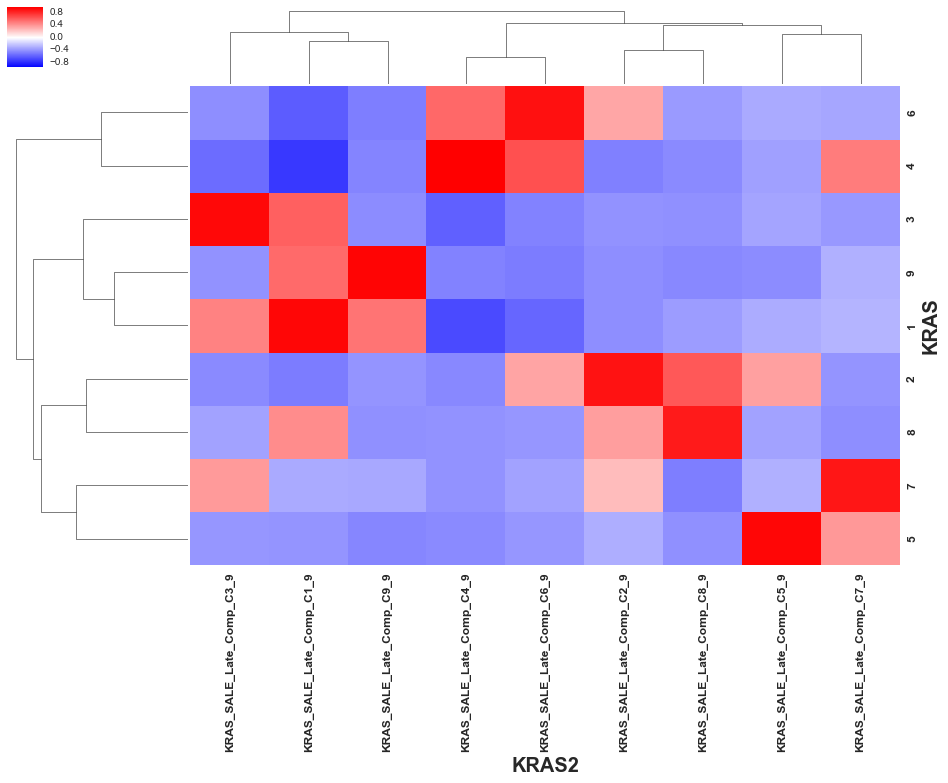

In [11]:
h_matrix = ccal.read_gct(RESULTS_DIR + '/nmf/matrices/nmf_k9_h.gct')
kras_h_matrix = ccal.read_gct(HOME_DIR +  '/UCSD_2015/signatures/paper2/analysis/Datasets/CCLE_RNAseq_KRAS_SALE_Late.No_HAEM.k_9.H.v1.gct')
ccal.association.make_comparison_panel(h_matrix, kras_h_matrix, matrix1_label='KRAS', matrix2_label='KRAS2', axis=1)

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
### 7. Pan-Can analysis

<hr style="border: none; border-bottom: 1px solid #88BBEE;">
#### 7.1 Read Pancan datasets

In [19]:
PANCAN_MUT_CNA = DATA_DIR + '/PANCAN12.mutation.whitelist.v2.1.gct'
PANCAN_GENE_EXPRESSION = DATA_DIR + '/PanTCGA_expression_profile.out.v2.SUBSET.gct'
PANCAN_PATHWAY_EXPRESSION =DATA_DIR + '/PanTCGA_expression_profile.out.v2.MSIGDB_plus_paper_complementary_signatures.gct'
PANCAN_PROTEIN_EXPRESSION = DATA_DIR + '/PANCAN_TCGA_RPPA.gct'
PANCAN_H_MATRIX = DATA_DIR + '/PanTCGA_expression_profile.out.v2.SUBSET.LUNG_KRAS_MUT.H_proj.v1.gct'

In [20]:
pancan_mut_cna_df = ccal.read_gct(PANCAN_MUT_CNA)
pancan_gene_expression_df = ccal.read_gct(PANCAN_GENE_EXPRESSION)
pancan_pathway_expression_df = ccal.read_gct(PANCAN_PATHWAY_EXPRESSION)
pancan_protein_expression_df = ccal.read_gct(PANCAN_PROTEIN_EXPRESSION)
pancan_h_matrix = ccal.read_gct(PANCAN_H_MATRIX)

<hr style="border: none; border-bottom: 1px solid #88BBEE;">
#### 7.2 Association analysis for KRAS components C3 and C6 in pancan datasets

KRAS Component C3 vs Protein Expression
KRAS Component C3 vs Mutations and CNA
KRAS Component C3 vs Gene Expression
KRAS Component C3 vs Pathway Expression
KRAS Component C7 vs Protein Expression
KRAS Component C7 vs Mutations and CNA
KRAS Component C7 vs Gene Expression
KRAS Component C7 vs Pathway Expression


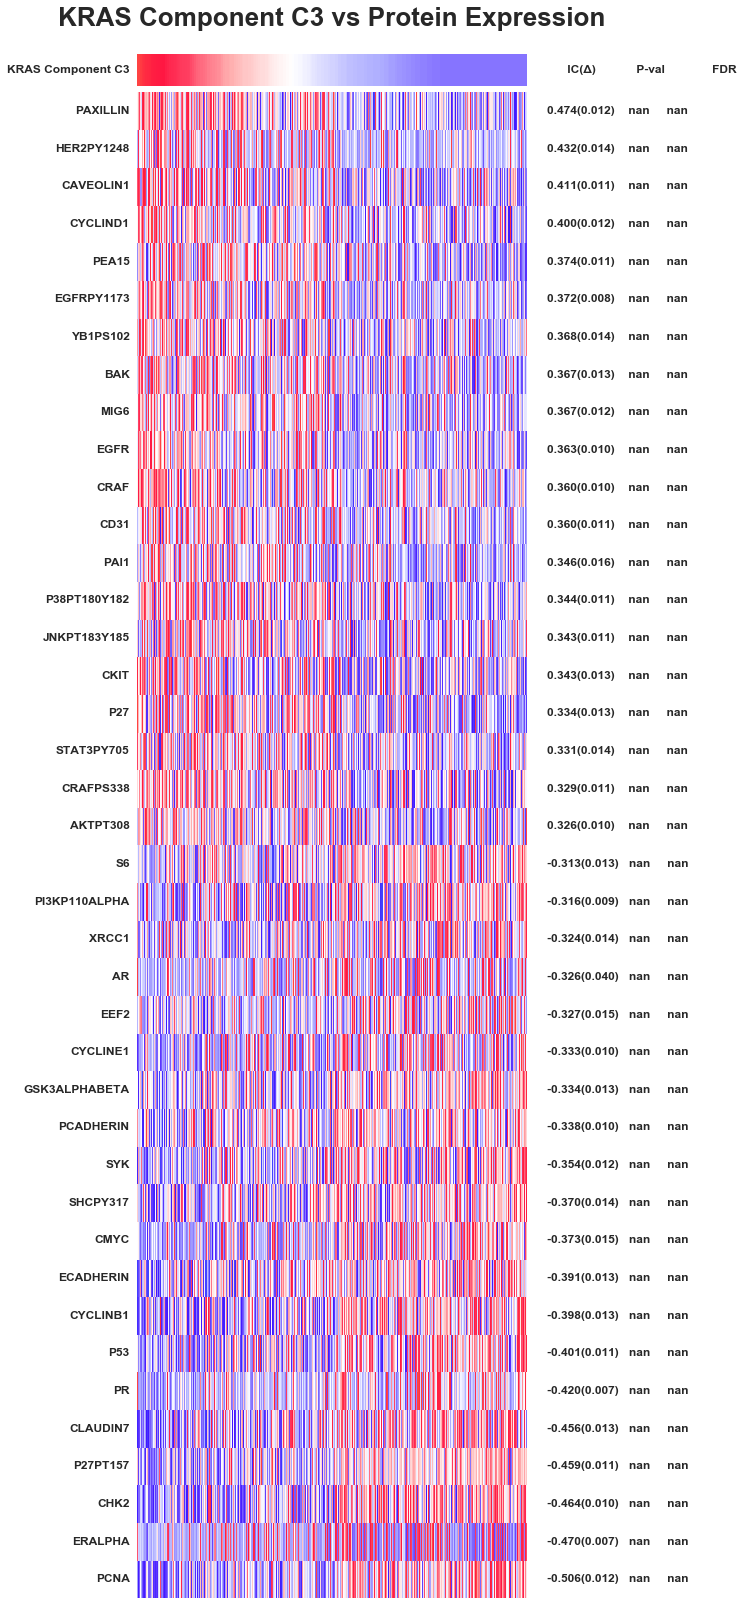

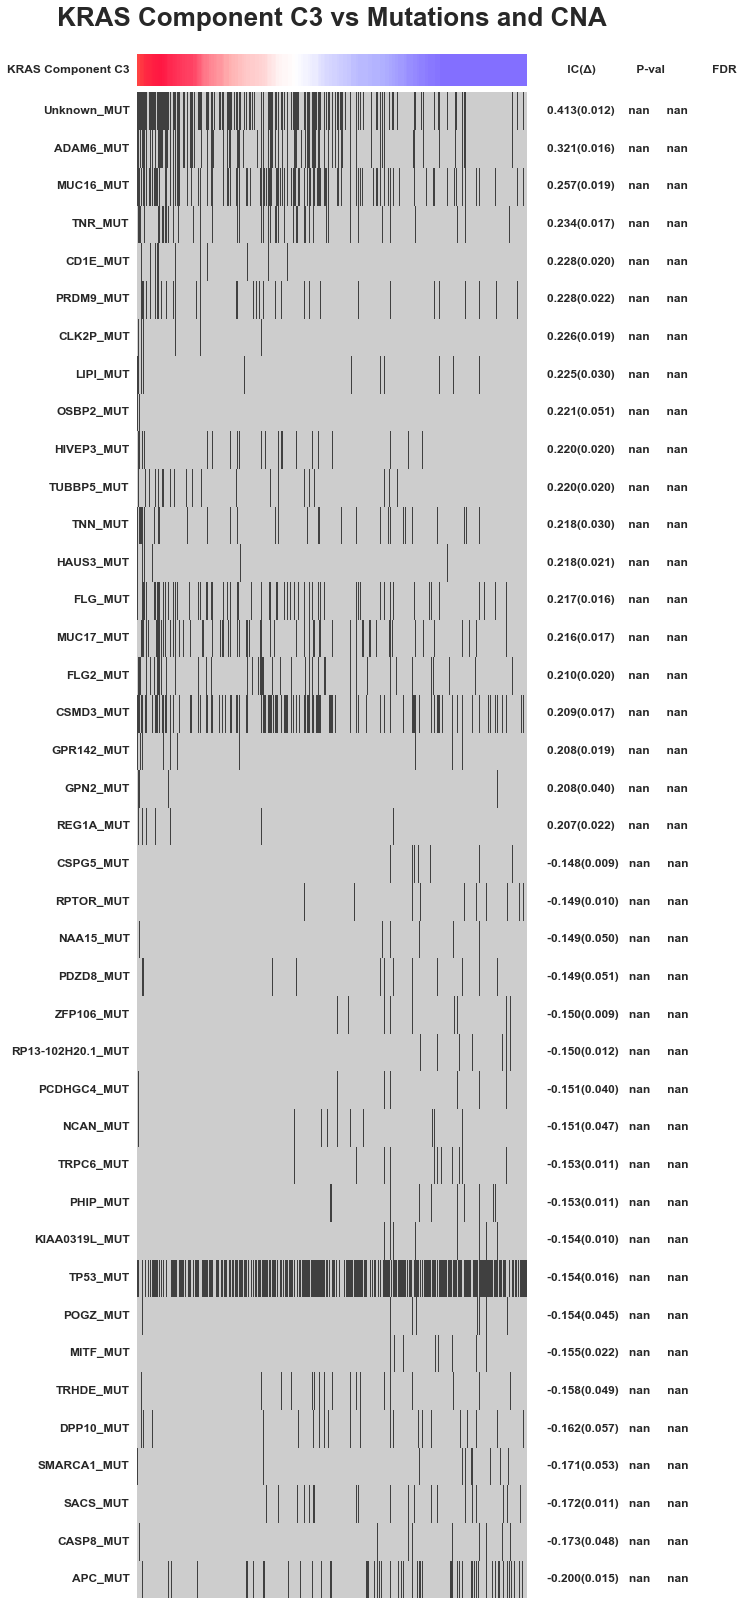

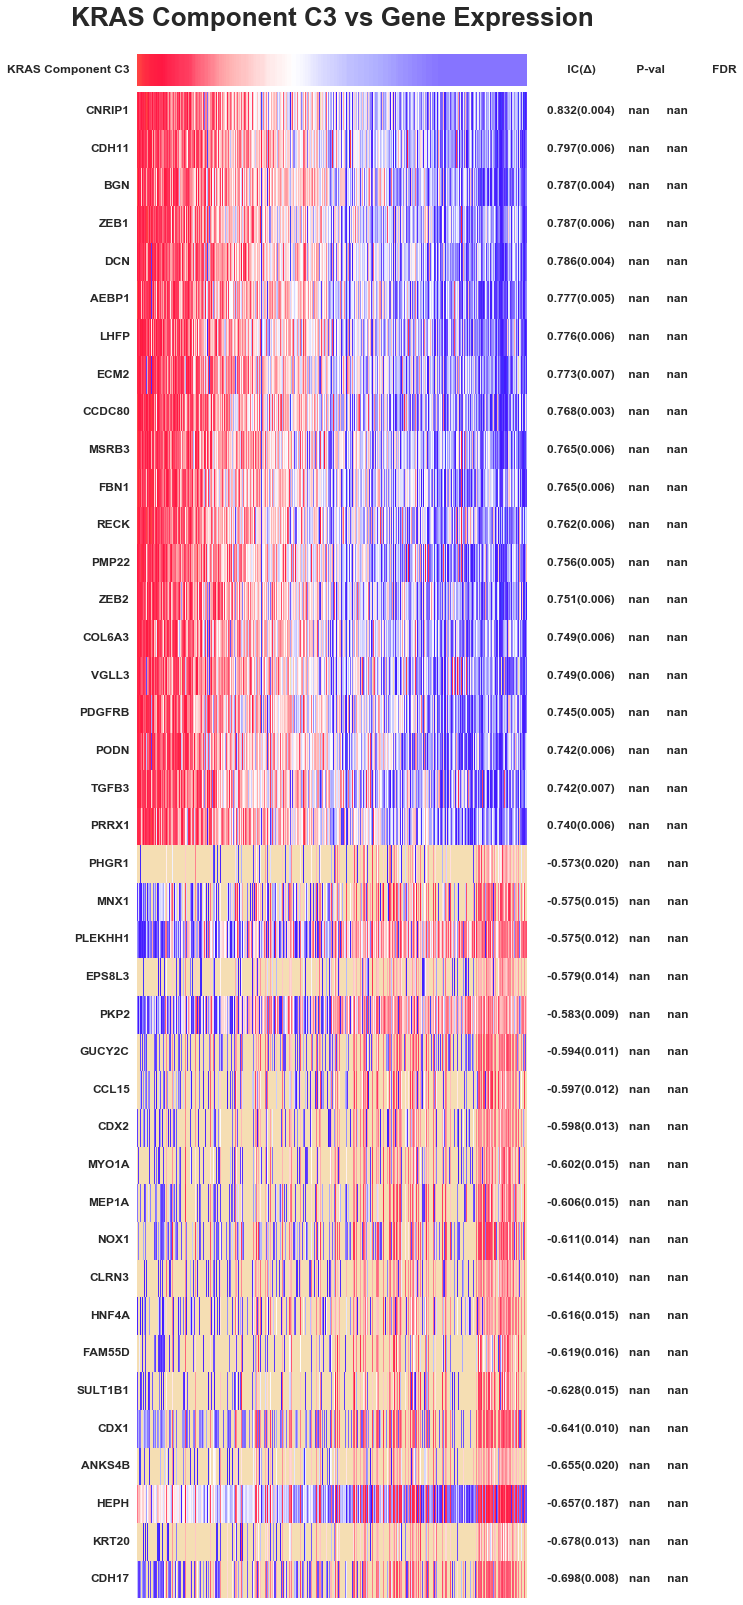

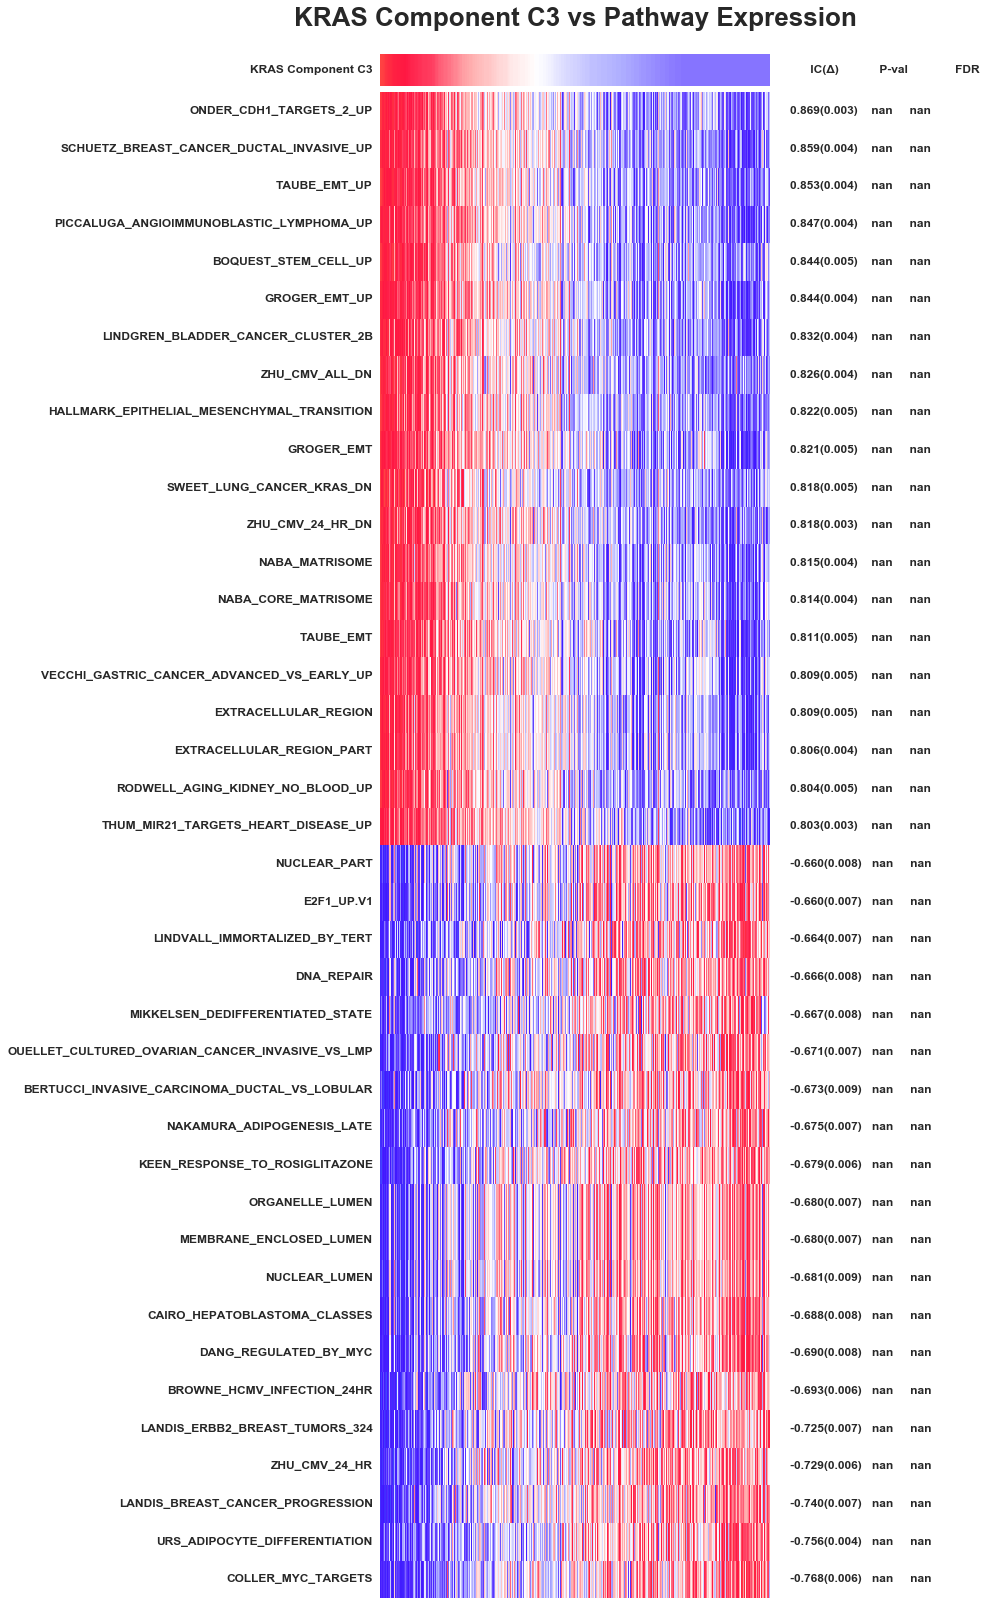

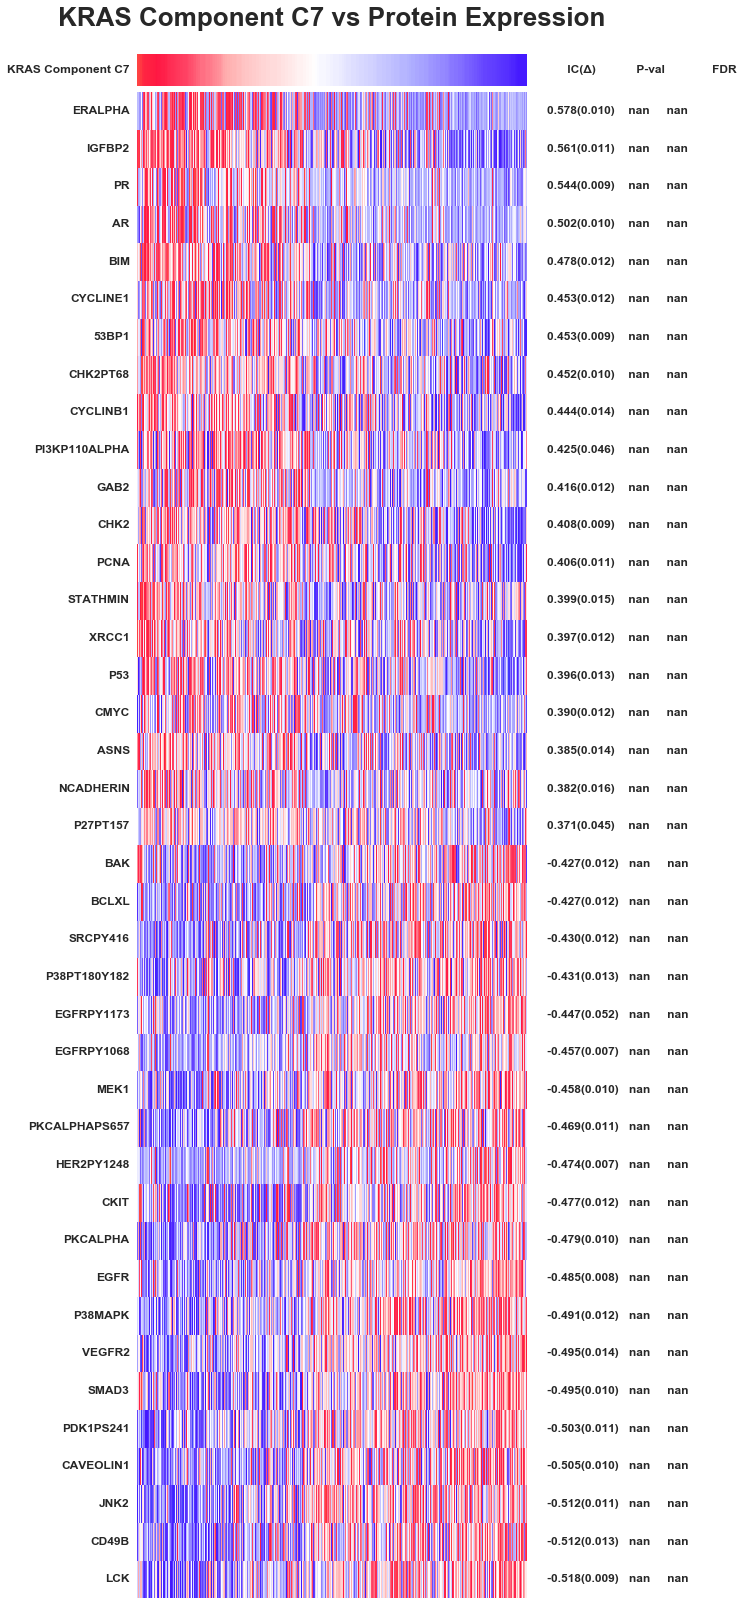

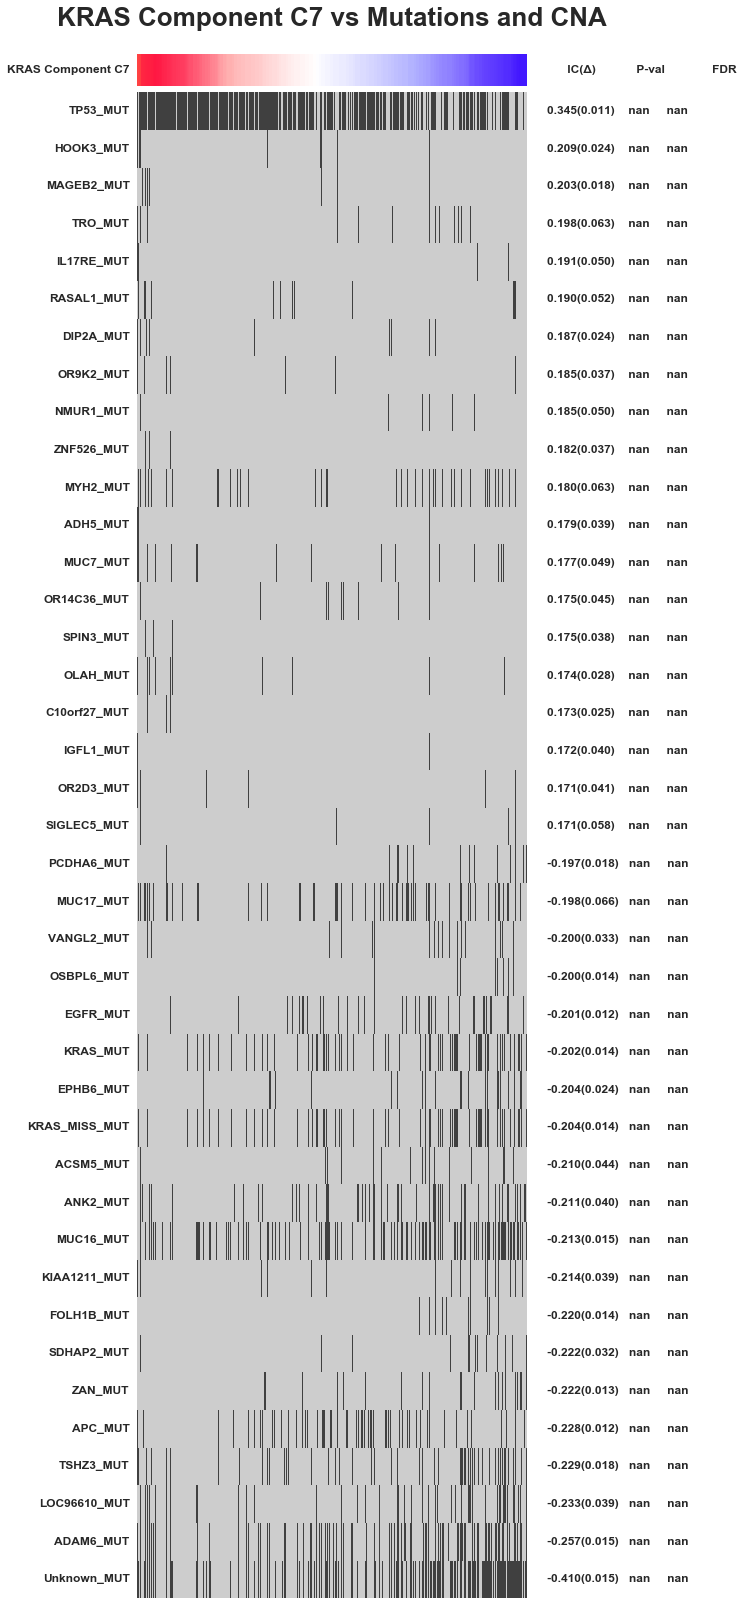

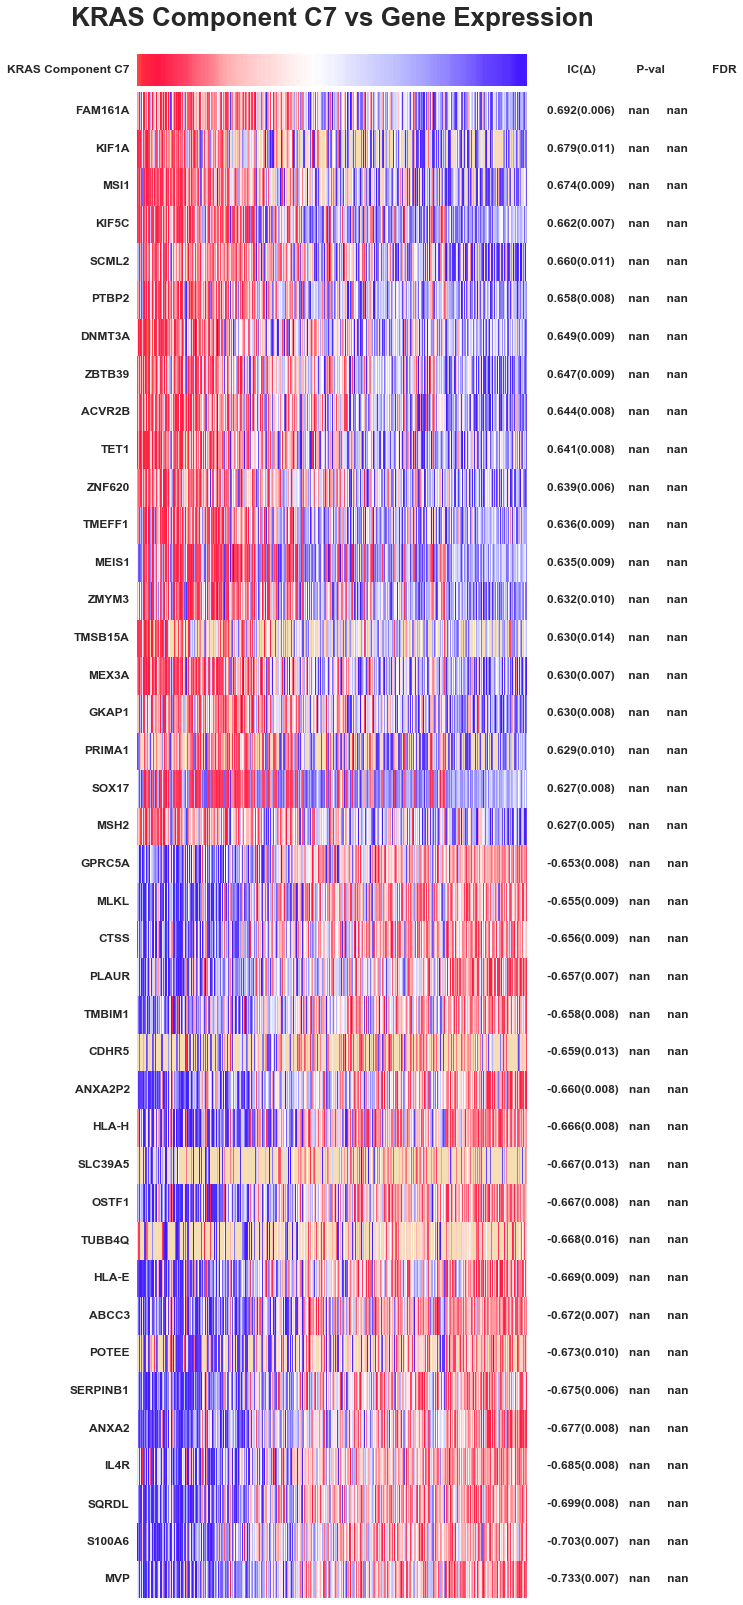

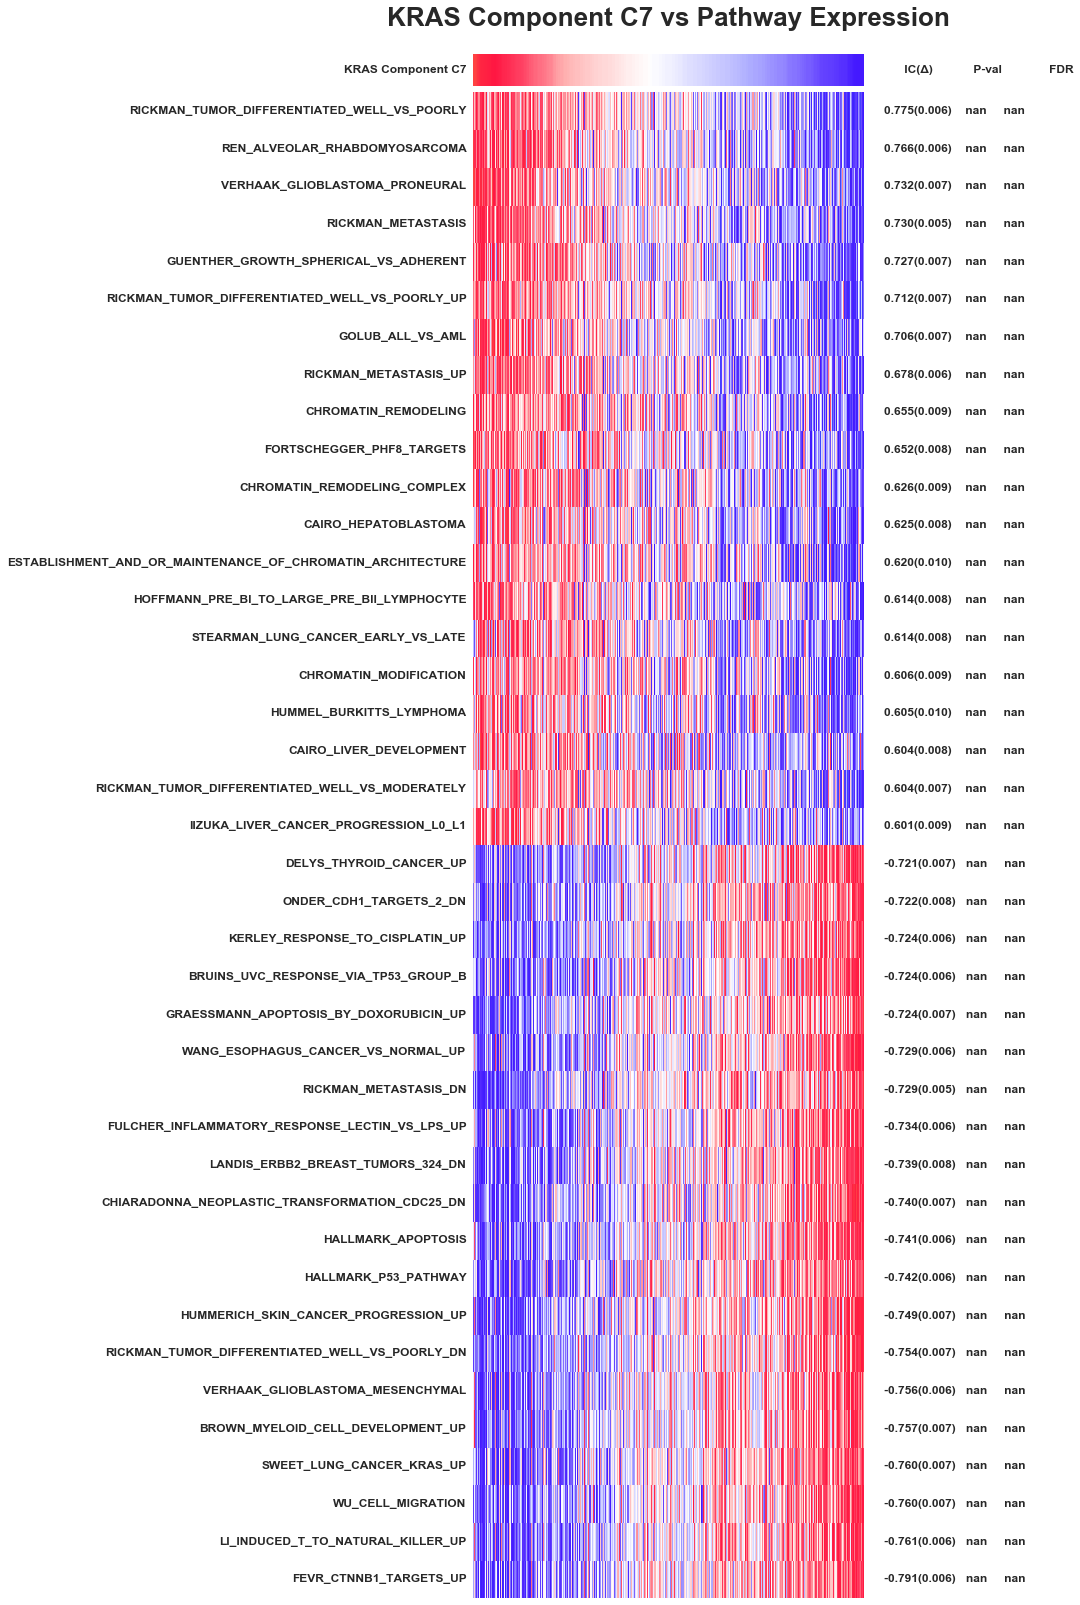

In [24]:
features_bundle = [
    ['Protein Expression', pancan_protein_expression_df, 'continuous', False, 0, [], []],
    ['Mutations and CNA', pancan_mut_cna_df, 'binary', False, 0, [], []],
    ['Gene Expression', pancan_gene_expression_df, 'continuous', False, 0, [], []],
    ['Pathway Expression', pancan_pathway_expression_df, 'continuous', False, 0, [], []]
]

for component in [3, 7]:
    target = pancan_h_matrix.ix[component, :]
    target.name = 'KRAS Component C{}'.format(component)
    for f in features_bundle:
        print('{} vs {}'.format(target.name, f[0]))
        ccal.association.make_association_panel(target = target, 
                                    features = f[1], 
                                    features_type = f[2], 
                                    n_features = 20,          
                                    n_permutations = 0,
                                    title= '{} vs {}'.format(target.name, f[0]),  
                                    features_ascending = f[3],
                                    filepath_prefix= RESULTS_DIR + '/C{}'.format(component) + '/PANCAN_kras_state_C{}_vs_{}'.format(component,  f[0]),
                                    random_seed = 12345)   

<hr style="border: none; border-bottom: 1px solid #88BBEE;">
#### 7.3 Make vignette for components C3 and C6

In [28]:
component = 3
target = pancan_h_matrix.ix[component, :]
target.name = 'KRAS Component C3'

annotation_features = [
    ['Mutations and CNA', pancan_mut_cna_df, 'binary', False, 0, 
        ['KRAS_MUT', 'CTNNB1_MUT', 'APC_MUT'], ['KRAS mutation', 'Beta-Catenin mutation', 'APC mutation']],
    ['Pathway Expression', pancan_pathway_expression_df, 'continuous', False, 0, 
        ['SINGH_KRAS_DEPENDENCY_SIGNATURE_', 'BCAT_GDS748'], ['KRAS Dependency', 'Beta-Catenin Activation']],
    ['Protein Expression', pancan_protein_expression_df, 'continuous', True, 0, 
        ['ECADHERIN'], ['E-Cadherin']]
]

annotation_files = [
    ['Mutations and CNA', RESULTS_DIR + '/C3/PANCAN_kras_component_C3_vs_Mutations and CNA.txt'],
    ['Pathway Expression', RESULTS_DIR + '/C3/PANCAN_kras_component_C3_vs_Pathway Expression.txt'],
    ['Gene Dependency', RESULTS_DIR + '/C3/PANCAN_kras_component_C3_vs_Gene Dependency.txt']
]

ccal.association.make_association_summary_panel(target = target, 
                                                                                             data_bundle = annotation_features, 
                                                                                             annotation_files = annotation_files,
                                                                                             title = 'Selected Features for KRAS Component C3 in PANCAN datasets',
                                                                                             filepath = RESULTS_DIR + '/C3.PANCAN.vignette')

AttributeError: 'list' object has no attribute 'items'